# Testing CRIM Intervals
These tests demonstrate the how the CRIM Intervals system produces "matches" in various contexts:

**Exact Matches** (in all respects--melodic and rhythmic)
**Close Matches** (via tranposition, substitution of pitches and durations, ornamentation, and differences in overall length)
The CRIM intervals __[test file](https://drive.google.com/file/d/1DoXHAzj_QxLS7sFyyoqXOPUwYer4rKi6/view?usp=sharing)__ is the basis of our work.
It features a few basic soggetti, each heard in four different voices. These are marked with **Rehearsal Letters** in the score (see below). The successive statements of each soggetto are sometimes exactly the same, and sometimes differ in small ways, as noted here.


**Rehearsal A** (The soggetti match in all ways. They are *exactly the same*, except for octave transposition). They also form a PEn (8- @B2)

<ul>
    <li>V1@1</li>
    <li>V2@3</li>
    <li>V3@5</li>
    <li>V4@7</li>
</ul>


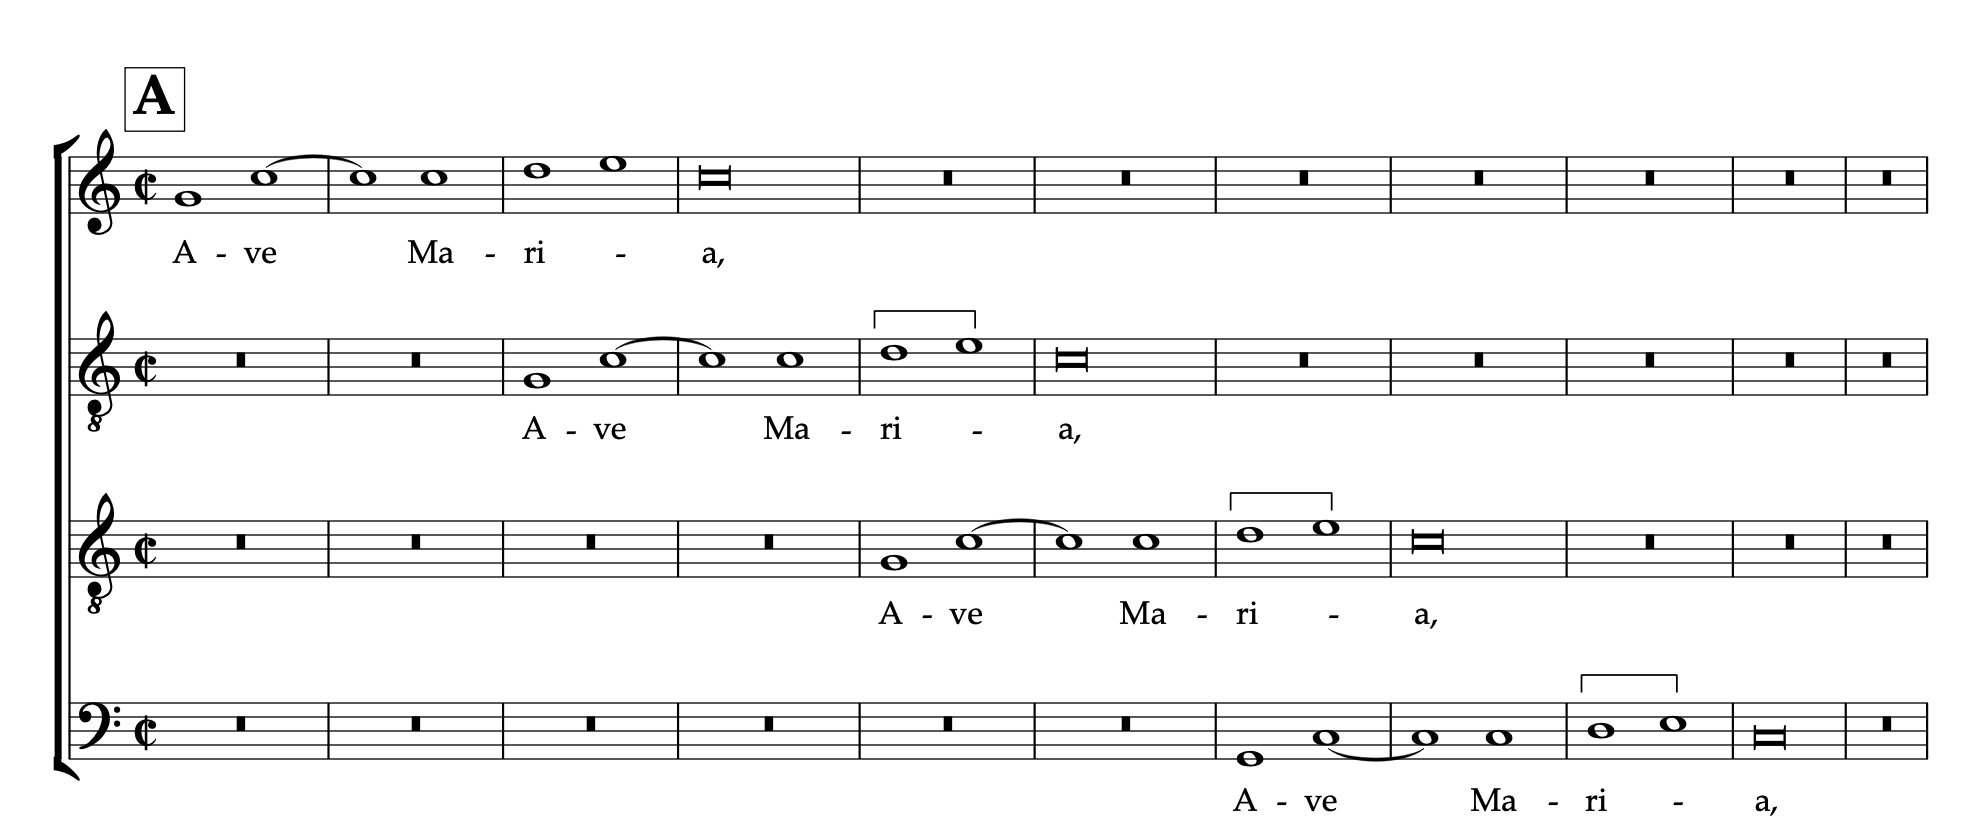

**Rehearsal B** (Pitches modified in various ways, as noted). They also form a PEn (8- @B2)

<ul>
    <li>V1@12 (Original Soggetto)</li>
    <li>V2@14 (Second pitch changed--a tonal flex. Durations identical)</li>
    <li>V3@16 (Second and third pitches changed. Durations identical)</li>
    <li>V4@18 (Original Soggetto)</li>
</ul>

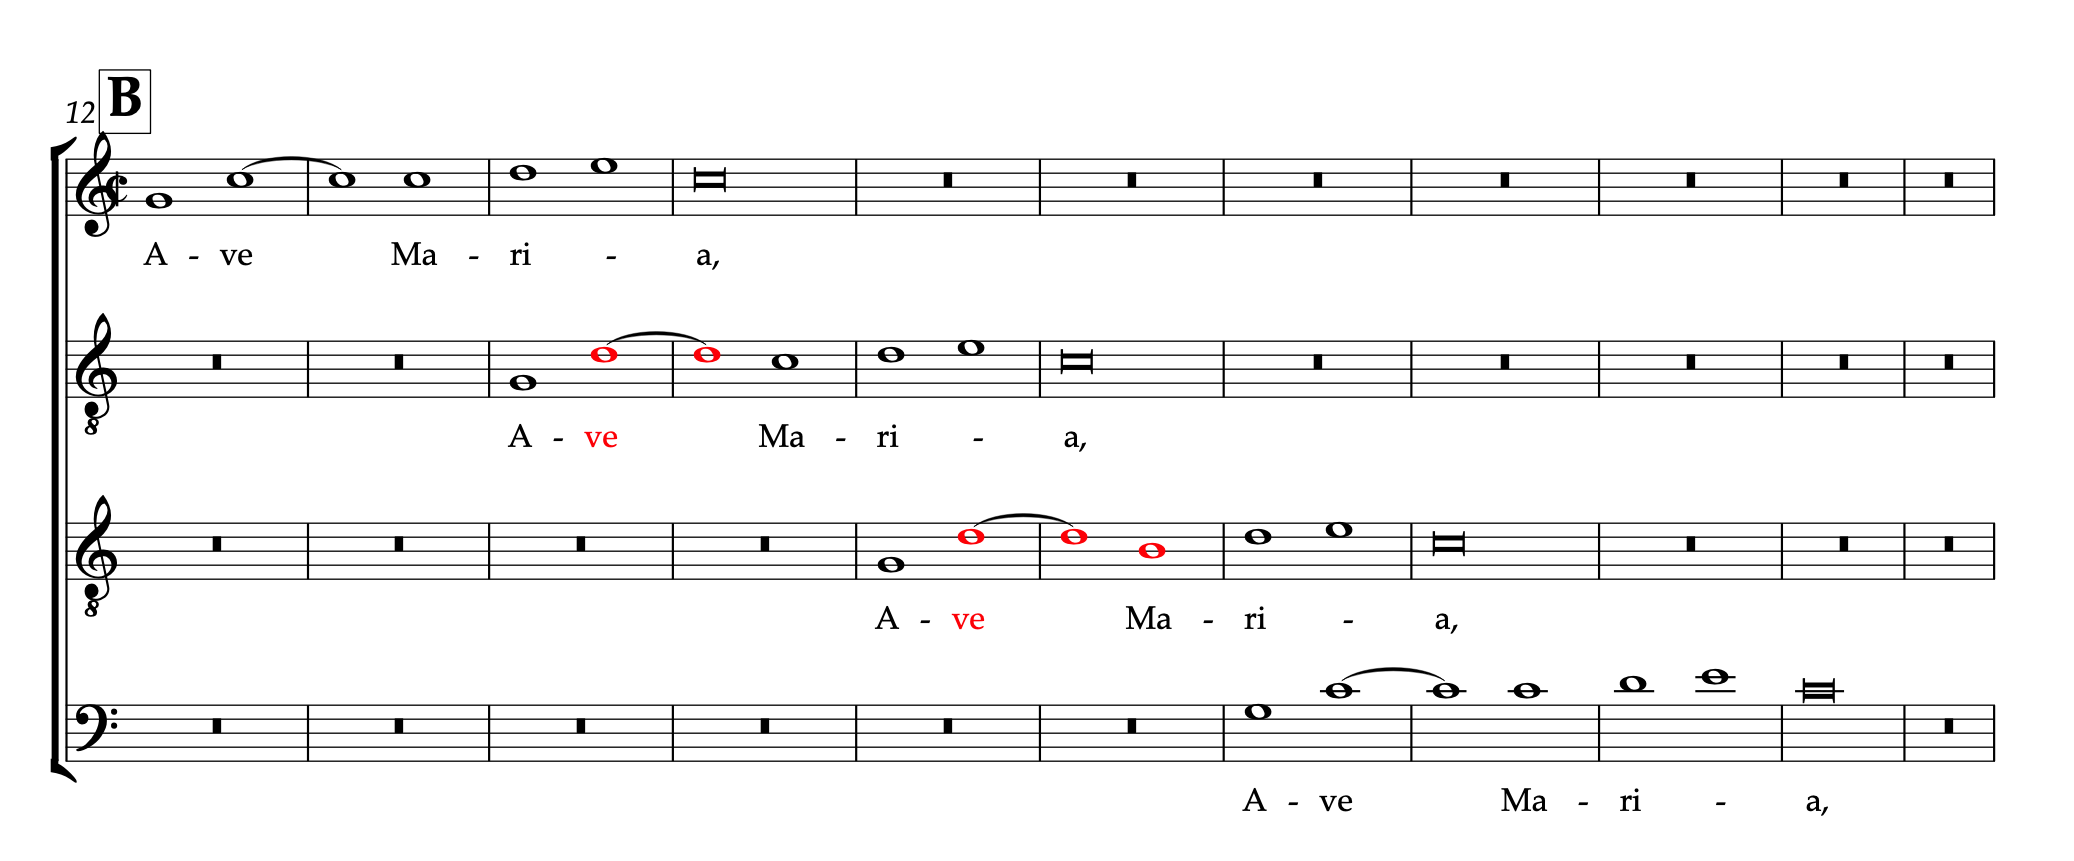

**Rehearsal C** (Transposed in ways that mean the melodic intervals are chromatically different, but diatonically the same.  This is a test for **vectors.semitone_intervals** vs **generic_intervals**

They also form a ID (B1/3/1)

<ul>
    <li>V1@23 (Original Soggetto)</li>
    <li>V2@24 (Transposed, now only matches for *generic* intervals)</li>
    <li>V3@27 (Transposed, but a *chromatic* match)</li>
    <li>V4@28 (Original melodic intervals and pitches, but one rhythm differs.  Same total duration)</li>
</ul>

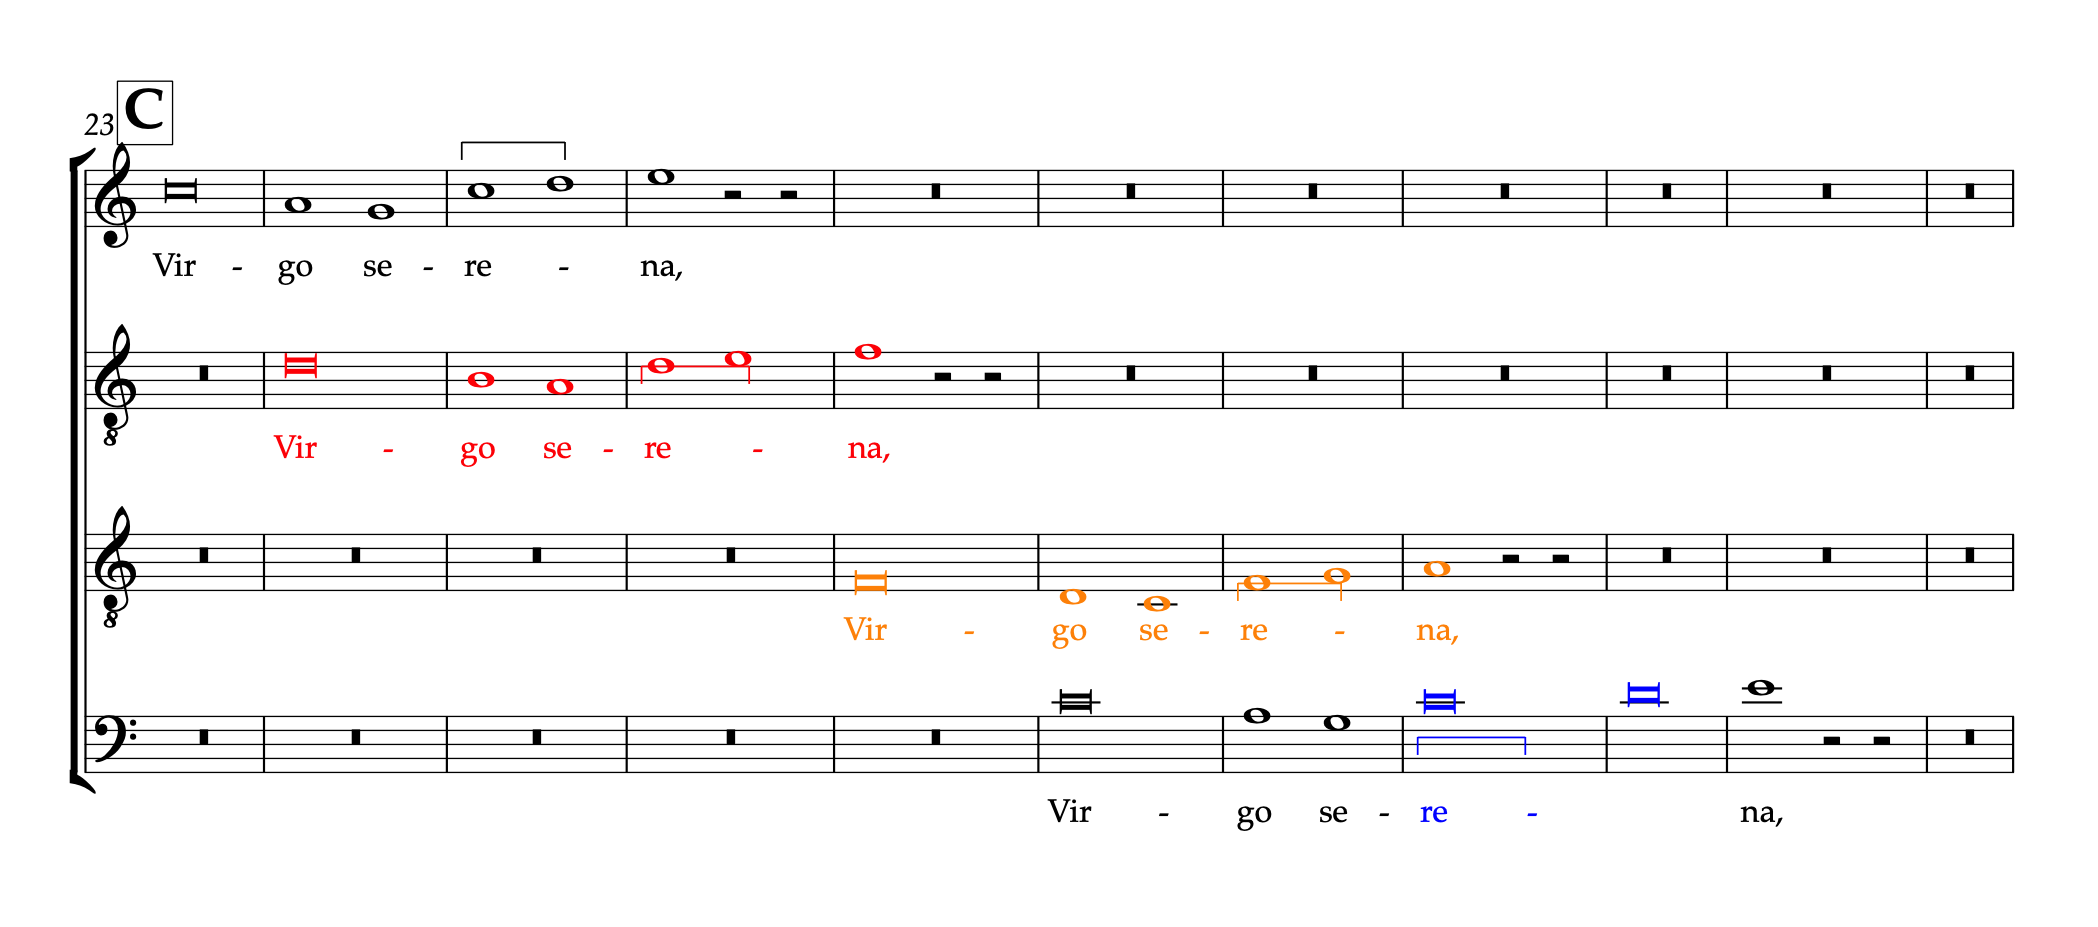

**Rehearsal D** (Soggetto ornamented in various ways, but same total duration. This will be a test for the **offset** method.  If measured at **offset = 2.0** they should all read as matches.)  They also form a Fuga (@B1/2/3)

<ul>
    <li>V1@34 (Original Soggetto)</li>
    <li>V2@35 (One additional diminution)</li>
    <li>V3@37 (Two additional diminutions)</li>
    <li>V4@40 (Four additional diminutions)</li>
</ul>

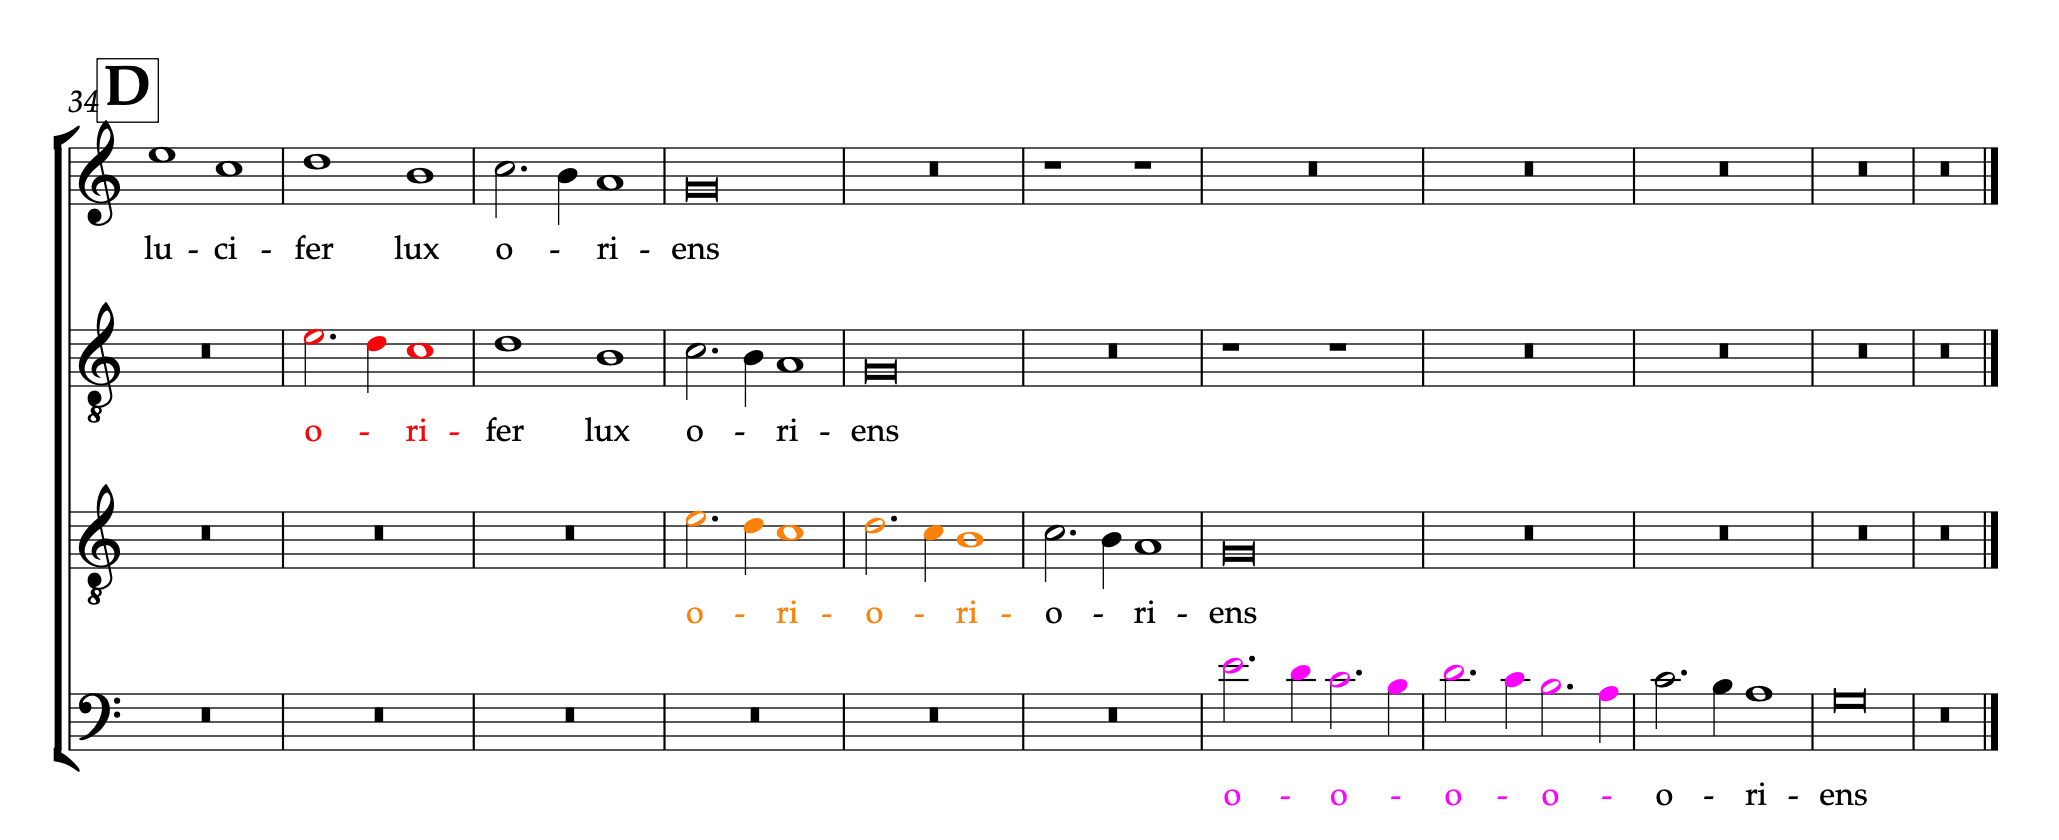

In [1]:
from crim_intervals import *
import pandas as pd

**Notes about the various parameters**

<ul>
    <li>Length of the Soggetto: <code>into_patterns([vectors.semitone_intervals], 5)</code> The **number** in this command represents the **minimum number of vectors to find**.  5 vectors is 6 notes.</li>
    <li>Chromatic uses <code>into_patterns([vectors.semitone_intervals], 5)</code></li>
    <li>Diatonic uses <code>into_patterns([vectors.generic_intervals], 5)</code></li> 
    <li>Exact is exact in *all* ways <code>find_exact_matches(patterns, 2)</code>.  The **number** in this command represents the **minimum number of matching melodies needed before reporting**.  This allows us to filter for common or uncommon soggetti.
    <li>Close matches allow for melodic variation (see more below).  <code>find_close_matches(patterns, 2, 1)</code></li>.  The **first number** in this command is the minimum number of melodies needed before reporting; the **second number** is threshold needed in order to find a match.  Lower number = very similar; higher number = less similar 
</ul>
        
**More about Close Matches**      
        Note: can vary cumulatively by the third number called in the method. We select two patterns, then compare each vector in each pattern successively.  The "differences" between each vector are summed. If that  value is below the threshold specified, we consider the two patterns closely matched. The format of the method call is <code> find_close_matches(the array you get from into_patterns, minimum matches needed to be displayed, threshold for close match)</code>.
        
**About Rhythmic Durations**

For <code>find_close_matches</code> and <code>find_exact_matches</code>, rhythmic variation/duration is displayed, but not factored into the calculation.
    


In [7]:
#corpus = CorpusBase([], ['/Users/rfreedma/MEI/CRIM_Intervals_Tests/CRIM_intervals_test.mei'])
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Model_0008.mei'])
vectors = IntervalBase(corpus.note_list)
#vectors = IntervalBase(corpus.note_list_incremental_offset(2))
patterns = into_patterns([vectors.generic_intervals], 5)
#patterns = into_patterns([vectors.semitone_intervals], 4)
exact_matches = find_exact_matches(patterns, 2)
#for item in exact_matches:
    #item.print_exact_matches()
#close_matches = find_close_matches(patterns, 4, 4)
#for item in close_matches:
    #item.print_close_matches()
#export_to_csv(exact_matches) 
#export_to_csv(close_matches) 
classify_matches(exact_matches, 2)
#export_to_csv(classify_matches)
#DF_output = pd.DataFrame(patterns)
#DF_output
#print(DF_output)
#pd.Series(patterns).to_csv("CRIM_Model_15_Mass_13_1_Vect5_Increm2_Close_2_data.csv")
classified_matches = classify_matches(exact_matches)
export_to_csv(classified_matches)
#DF_output = pd.DataFrame(classified_matches)
#DF_output
#print(DF_output)

Requesting file from https://crimproject.org/mei/CRIM_Model_0008.mei...
Successfully imported.
Finding exact matches...
61 melodic intervals had more than 2 exact matches.

Periodic Entry:
Pattern: [4, 1, 2, 2, -3], Locations in entry: 
- Measure 1 in voice 1
- Measure 3 in voice 2
- Measure 5 in voice 3
- Measure 7 in voice 4
Periodic Entry:
Pattern: [1, 2, -2, -2, -2], Locations in entry: 
- Measure 33 in voice 2
- Measure 37 in voice 4
- Measure 41 in voice 1
Periodic Entry:
Pattern: [2, -3, 2, 2, 2], Locations in entry: 
- Measure 45 in voice 3
- Measure 45 in voice 1
- Measure 47 in voice 3
- Measure 47 in voice 1
Imitative Duo:
Pattern: [2, 2, -3, -2, -2], Locations in entry: 
- Measure 55 in voice 1
- Measure 56 in voice 2
- Measure 60 in voice 3
- Measure 61 in voice 4
Imitative Duo:
Pattern: [2, 2, 1, 2, -2], Locations in entry: 
- Measure 32 in voice 1
- Measure 32 in voice 2
- Measure 36 in voice 3
- Measure 36 in voice 4
Imitative Duo:
Pattern: [1, 1, 2, -2, -2], Locations 

AttributeError: 'list' object has no attribute 'matches'

The results are summarized [here](https://docs.google.com/document/d/1mUaTUqv4e_Em0gtNFNrUb9aClzbFb2vb8HdVbQCefiU/edit?usp=sharing), with comments.

In [3]:
#This is for incremental offset, to show list of notes and offsets
#full_corpus = CorpusBase(LIST_OF_MEI_URLS, [])
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0001_1.mei'])
nl = corpus.note_list
v = IntervalBase(corpus.note_list_incremental_offset(.0833))
vi = v.generic_intervals
data = [(i.note1.part, i.vector, i.note1.duration) for i in vi]
#print(data)
DF_output = pd.DataFrame(data)
print(DF_output)
pd.Series(data).to_csv("increment_data.csv")

Requesting file from https://crimproject.org/mei/CRIM_Mass_0001_1.mei...
Successfully imported.
              0  1       2
0      Superius  1  0.0833
1      Superius  1  0.0833
2      Superius  1  0.0833
3      Superius  1  0.0833
4      Superius  1  0.0833
...         ... ..     ...
12094    Bassus  1  0.0833
12095    Bassus  1  0.0833
12096    Bassus  1  0.0833
12097    Bassus  1  0.0833
12098    Bassus  1  0.0833

[12099 rows x 3 columns]


/Users/rfreedma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


In [1]:
import crim_intervals as ci
import pandas as pd

def get_match_data_for_piece(piece_id, vector_size=5, min_matches=2, close_distance=2):
    
    url = f"https://crimproject.org/mei/{piece_id}.mei"
    score = ci.ScoreBase(url)
    vectors = ci.IntervalBase(score.note_list)
    #Select ONE of the following:  Generic or Semitone intervals
    patterns = ci.into_patterns([vectors.generic_intervals], vector_size)
    #patterns = ci.into_patterns([vectors.semitone_intervals], vector_size)
    #Select ONE of the following, either CLOSE or EXACT
    matches = ci.find_close_matches(patterns, min_matches, close_distance)
    #matches = ci.find_exact_matches(patterns, min_matches)
    match_data = []   
    for match_series in matches:
        for match in match_series.matches:
            match_dict = {
              "pattern_generating_match": match_series.pattern,
              "pattern_matched": match.pattern, 
              "piece_title": match.first_note.metadata.title, 
              "part": match.first_note.part, 
              "start_measure": match.first_note.note.measureNumber, 
              "end_measure": match.last_note.note.measureNumber, 
              "note_durations": match.durations, 
              #"ema": match.ema, 
              #"ema_url": match.ema_url
            }

            match_data.append(match_dict)

    
    
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    return pd.DataFrame(match_data)


In [15]:
get_match_data_for_piece('CRIM_Model_0025', vector_size=7, min_matches=4, close_distance=1)

Requesting file from https://crimproject.org/mei/CRIM_Model_0025.mei...
Successfully imported.
Finding close matches...
4 melodic intervals had more than 4 exact or close matches.



,pattern_generating_match,pattern_matched,piece_title,part,start_measure,end_measure,note_durations
0,"[2, 2, 2, -3, 2, 2, -3]","[2, 2, 2, -3, 2, 2, -3]",None,cantus,75,77,"[2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 4.0]"
1,"[2, 2, 2, -3, 2, 2, -3]","[2, 2, 2, -3, 2, 2, -3]",None,altus,76,78,"[2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0]"
2,"[2, 2, 2, -3, 2, 2, -3]","[2, 2, 2, -3, 2, 2, -3]",None,altus,86,88,"[2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0]"
3,"[2, 2, 2, -3, 2, 2, -3]","[2, 2, 2, -3, 2, 2, -2]",None,tenor,85,86,"[2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0]"
4,"[2, 2, 2, -3, 2, 2, -3]","[2, 2, 2, -3, 2, 2, -3]",None,quintus,74,76,"[2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 4.0]"
5,"[2, 2, 2, -3, 2, 2, -3]","[2, 2, 2, -3, 2, 2, -3]",None,bassus,84,85,"[2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 4.0]"
6,"[2, 2, -3, 2, 2, -3, -2]","[2, 2, -3, 2, 2, -3, -2]",None,cantus,76,77,"[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 4.0, 2.0]"
7,"[2, 2, -3, 2, 2, -3, -2]","[2, 2, -3, 2, 2, -3, -2]",None,altus,77,78,"[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0]"
8,"[2, 2, -3, 2, 2, -3, -2]","[2, 2, -3, 2, 2, -3, -3]",None,altus,87,88,"[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0]"
9,"[2, 2, -3, 2, 2, -3, -2]","[2, 2, -3, 2, 2, -3, -2]",None,quintus,75,76,"[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 4.0, 4.0]"
